<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/hor%C3%A1rio_de_pico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [58]:
name = 'drive/My Drive/Aline/data/Relatório de Vendas - 2020-08-21 até 2020-08-25.csv'
df = pd.read_csv(name, header = 0, sep=";")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Loja           1525 non-null   int64 
 1   PDV            1525 non-null   int64 
 2   Data da venda  1525 non-null   object
 3   Hora da venda  1525 non-null   object
dtypes: int64(2), object(2)
memory usage: 47.8+ KB


In [60]:
df.shape

(1525, 4)

In [61]:
df.columns = ["Loja", "PDV", "Data_da_venda", "Hora_da_venda"] 
df["Data_da_venda"] = pd.to_datetime(df["Data_da_venda"])

In [62]:
df.head()

,Loja,PDV,Data_da_venda,Hora_da_venda
0,1041,303,2020-08-21,12:07:09
1,1041,303,2020-08-21,12:08:14
2,1041,303,2020-08-21,12:10:29
3,1041,303,2020-08-21,12:13:31
4,1041,303,2020-08-21,12:14:58


In [67]:
df['Hora'] = pd.to_datetime(df['Hora_da_venda'], format= '%H:%M:%S').apply(lambda x: x.strftime('%H')).astype(int)
df['Pessoas'] = np.ones((len(df))).astype(int)

In [68]:
df.head()

,Loja,PDV,Data_da_venda,Hora_da_venda,Hora,Pessoas
0,1041,303,2020-08-21,12:07:09,12,1
1,1041,303,2020-08-21,12:08:14,12,1
2,1041,303,2020-08-21,12:10:29,12,1
3,1041,303,2020-08-21,12:13:31,12,1
4,1041,303,2020-08-21,12:14:58,12,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Loja           1525 non-null   int64         
 1   PDV            1525 non-null   int64         
 2   Data_da_venda  1525 non-null   datetime64[ns]
 3   Hora_da_venda  1525 non-null   object        
 4   Hora           1525 non-null   int64         
 5   Pessoas        1525 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 71.6+ KB


In [73]:
table = pd.pivot_table(df, values='Pessoas',
                       columns=['Data_da_venda'],
                       index = ['Hora'],
                       aggfunc=np.sum,
                       fill_value=0 )
table.head()

Data_da_venda,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25
Hora,,,,,
11,1,0,0,0,1
12,27,29,18,28,28
13,43,39,39,29,36
14,30,43,50,31,30
15,30,49,62,42,29


In [74]:
table.describe()

Data_da_venda,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,29.200000,33.200000,35.100000,28.000000,27.000000
std,15.802953,16.903649,21.768734,13.638182,13.540064
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25.500000,29.000000,20.500000,28.250000,28.250000
50%,30.000000,41.000000,40.500000,31.000000,30.000000
75%,40.750000,44.750000,53.000000,36.000000,35.750000
max,51.000000,49.000000,62.000000,42.000000,41.000000


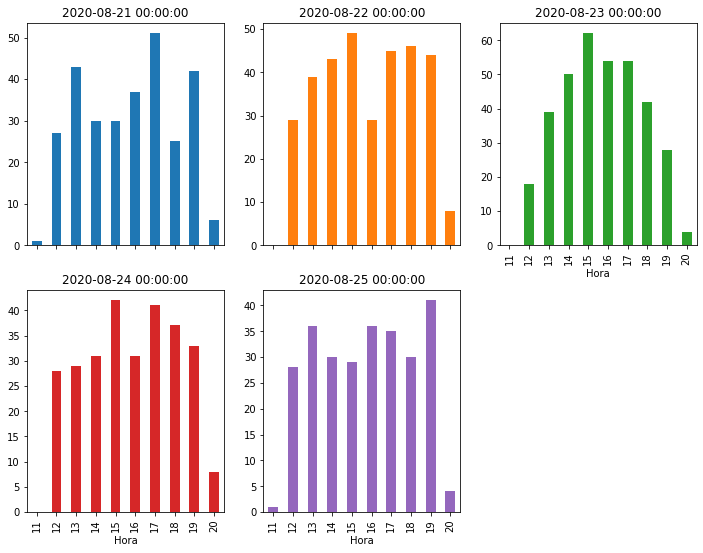

In [85]:
table.plot.bar(subplots=True, layout=(2, 3), figsize = (12,9), legend=False)
plt.show()